### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df  =pd.read_csv('D:\\Study Work\\Projects\\Uber Data Analytics\\data\\uber.csv')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.shape

(150000, 21)

### Data Checks to perform

#### Missing Values

In [4]:
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

##### Missing Values Clarification

Some columns have missing values, but these are **not mistakes**.  
They depend on what happened with the booking.

##### Example:
- If a ride was **cancelled**, then columns like:
  - Avg CTAT  
  - Incomplete Rides  
  - Incomplete Rides Reason  
  - Booking Value  
  - Ride Distance  
  - Driver Ratings  
  - Customer Rating  
  - Payment Method  
  will be empty (null).  

##### Either–Or Columns:
Some columns cannot have values at the same time. For example:  
- If there is a value in **Cancelled Rides by Customer**, then **Reason for Cancelling by Customer** will also have a value.  
- If there is a value in **Cancelled Rides by Driver**, then **Driver Cancellation Reason** will have a value.  
- If there is a value in **Incomplete Rides**, then **Incomplete Rides Reason** will have a value.  

👉 So, missing values are **normal and expected** in this dataset.

#### Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

#### Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

#### Unique values in each column

In [7]:
df.nunique()

Date                                    365
Time                                  62910
Booking ID                           148767
Booking Status                            5
Customer ID                          148788
Vehicle Type                              7
Pickup Location                         176
Drop Location                           176
Avg VTAT                                181
Avg CTAT                                351
Cancelled Rides by Customer               1
Reason for cancelling by Customer         5
Cancelled Rides by Driver                 1
Driver Cancellation Reason                4
Incomplete Rides                          1
Incomplete Rides Reason                   3
Booking Value                          2566
Ride Distance                          4901
Driver Ratings                           21
Customer Rating                          21
Payment Method                            5
dtype: int64

#### Statistics of the data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg VTAT,139500.0,8.456352,3.773564,2.0,5.30,8.30,11.30,20.0
Avg CTAT,102000.0,29.149636,8.902577,10.0,21.60,28.80,36.80,45.0
Cancelled Rides by Customer,10500.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Cancelled Rides by Driver,27000.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Incomplete Rides,9000.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Booking Value,102000.0,508.295912,395.805774,50.0,234.00,414.00,689.00,4277.0
Ride Distance,102000.0,24.637012,14.002138,1.0,12.46,23.72,36.82,50.0
Driver Ratings,93000.0,4.230992,0.436871,3.0,4.10,4.30,4.60,5.0
Customer Rating,93000.0,4.404584,0.437819,3.0,4.20,4.50,4.80,5.0


#### Exploring the data

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']

We have 12 categorical features : ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason', 'Payment Method']


### Data Cleaning & Preprocessing

**Convert Date and Time column (Year,Month,Day,Hour):**

In [10]:
#Create a 'date_time' column by combining 'Date' and 'Time'
df['date_time']= pd.to_datetime(df['Date']+' '+df['Time'])

#Extract 'Month','Day','Hour' from 'date_time'
df['Month']= df['date_time'].dt.month
df['Day']= df['date_time'].dt.day_name()
df['Hour']=df['date_time'].dt.hour

#Sort the dataframe by 'date_time'
df= df.sort_values(by='date_time')

#Reorder columns to have 'Month', 'Day', 'Hour' first
new_cols= ['Month','Day','Hour']
df= df[ new_cols + [c for c in df.columns if c not in new_cols ]]



df= df.reset_index(drop= True)

**Filling the Missing values**

In [11]:
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Reason Unkown')
df['Incomplete Rides Reason'].unique()

array(['Reason Unkown', 'Customer Demand', 'Vehicle Breakdown',
       'Other Issue'], dtype=object)

In [12]:
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Reason Unkown')
df['Driver Cancellation Reason'].unique()

array(['Reason Unkown', 'More than permitted people in there',
       'Personal & Car related issues', 'The customer was coughing/sick',
       'Customer related issue'], dtype=object)

In [13]:
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Reason Unkown')


In [14]:
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0) # 0 Indicates completed Rides

In [15]:
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0) # 0 Indicates non cancelled Rides
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0) # 0 Indicates non cancelled Rides

In [16]:
df['Reason for cancelling by Customer'].unique()

array(['Reason Unkown', 'Driver asked to cancel',
       'Driver is not moving towards pickup location', 'Wrong Address',
       'Change of plans', 'AC is not working'], dtype=object)

In [17]:
df['Payment Method'] = df['Payment Method'].fillna('Unknown')


In [18]:
df['Payment Method'].unique()

array(['Cash', 'Uber Wallet', 'Unknown', 'UPI', 'Credit Card',
       'Debit Card'], dtype=object)

In [19]:
df.isna().sum()

Month                                    0
Day                                      0
Hour                                     0
Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             10500
Avg CTAT                             48000
Cancelled Rides by Customer              0
Reason for cancelling by Customer        0
Cancelled Rides by Driver                0
Driver Cancellation Reason               0
Incomplete Rides                         0
Incomplete Rides Reason                  0
Booking Value                        48000
Ride Distance                        48000
Driver Ratings                       57000
Customer Rating                      57000
Payment Met

**Observation in the above missing values:**

1. Avg VTAT (10,500 missing)
   * VTAT = Vehicle Turn Around Time (likely when ride is completed/assigned).
   * Missing values could mean no vehicle assigned (cancellations, no-shows).

2. Avg CTAT (48,000 missing)
   * CTAT = Customer Turn Around Time (time from request to ride start).
   * Missing if ride was cancelled or incomplete.

3. Booking Value (48,000 missing)
   * Missing when ride not completed (cancelled/incomplete).

4. Ride Distance (48,000 missing)
   * Naturally missing if the ride never happened.

5. Driver Ratings & Customer Ratings (57,000 missing each)
   * Ratings are only given after a ride completes. Or maybe, the rating has not been given.

### Exploratory Data Analysis (EDA)

In [20]:
df.head(2)

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time
0,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,0.0,Reason Unkown,0.0,Reason Unkown,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34
1,1,Monday,1,2024-01-01,01:35:18,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,...,0.0,Reason Unkown,0.0,Reason Unkown,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18


#### Booking Distribution

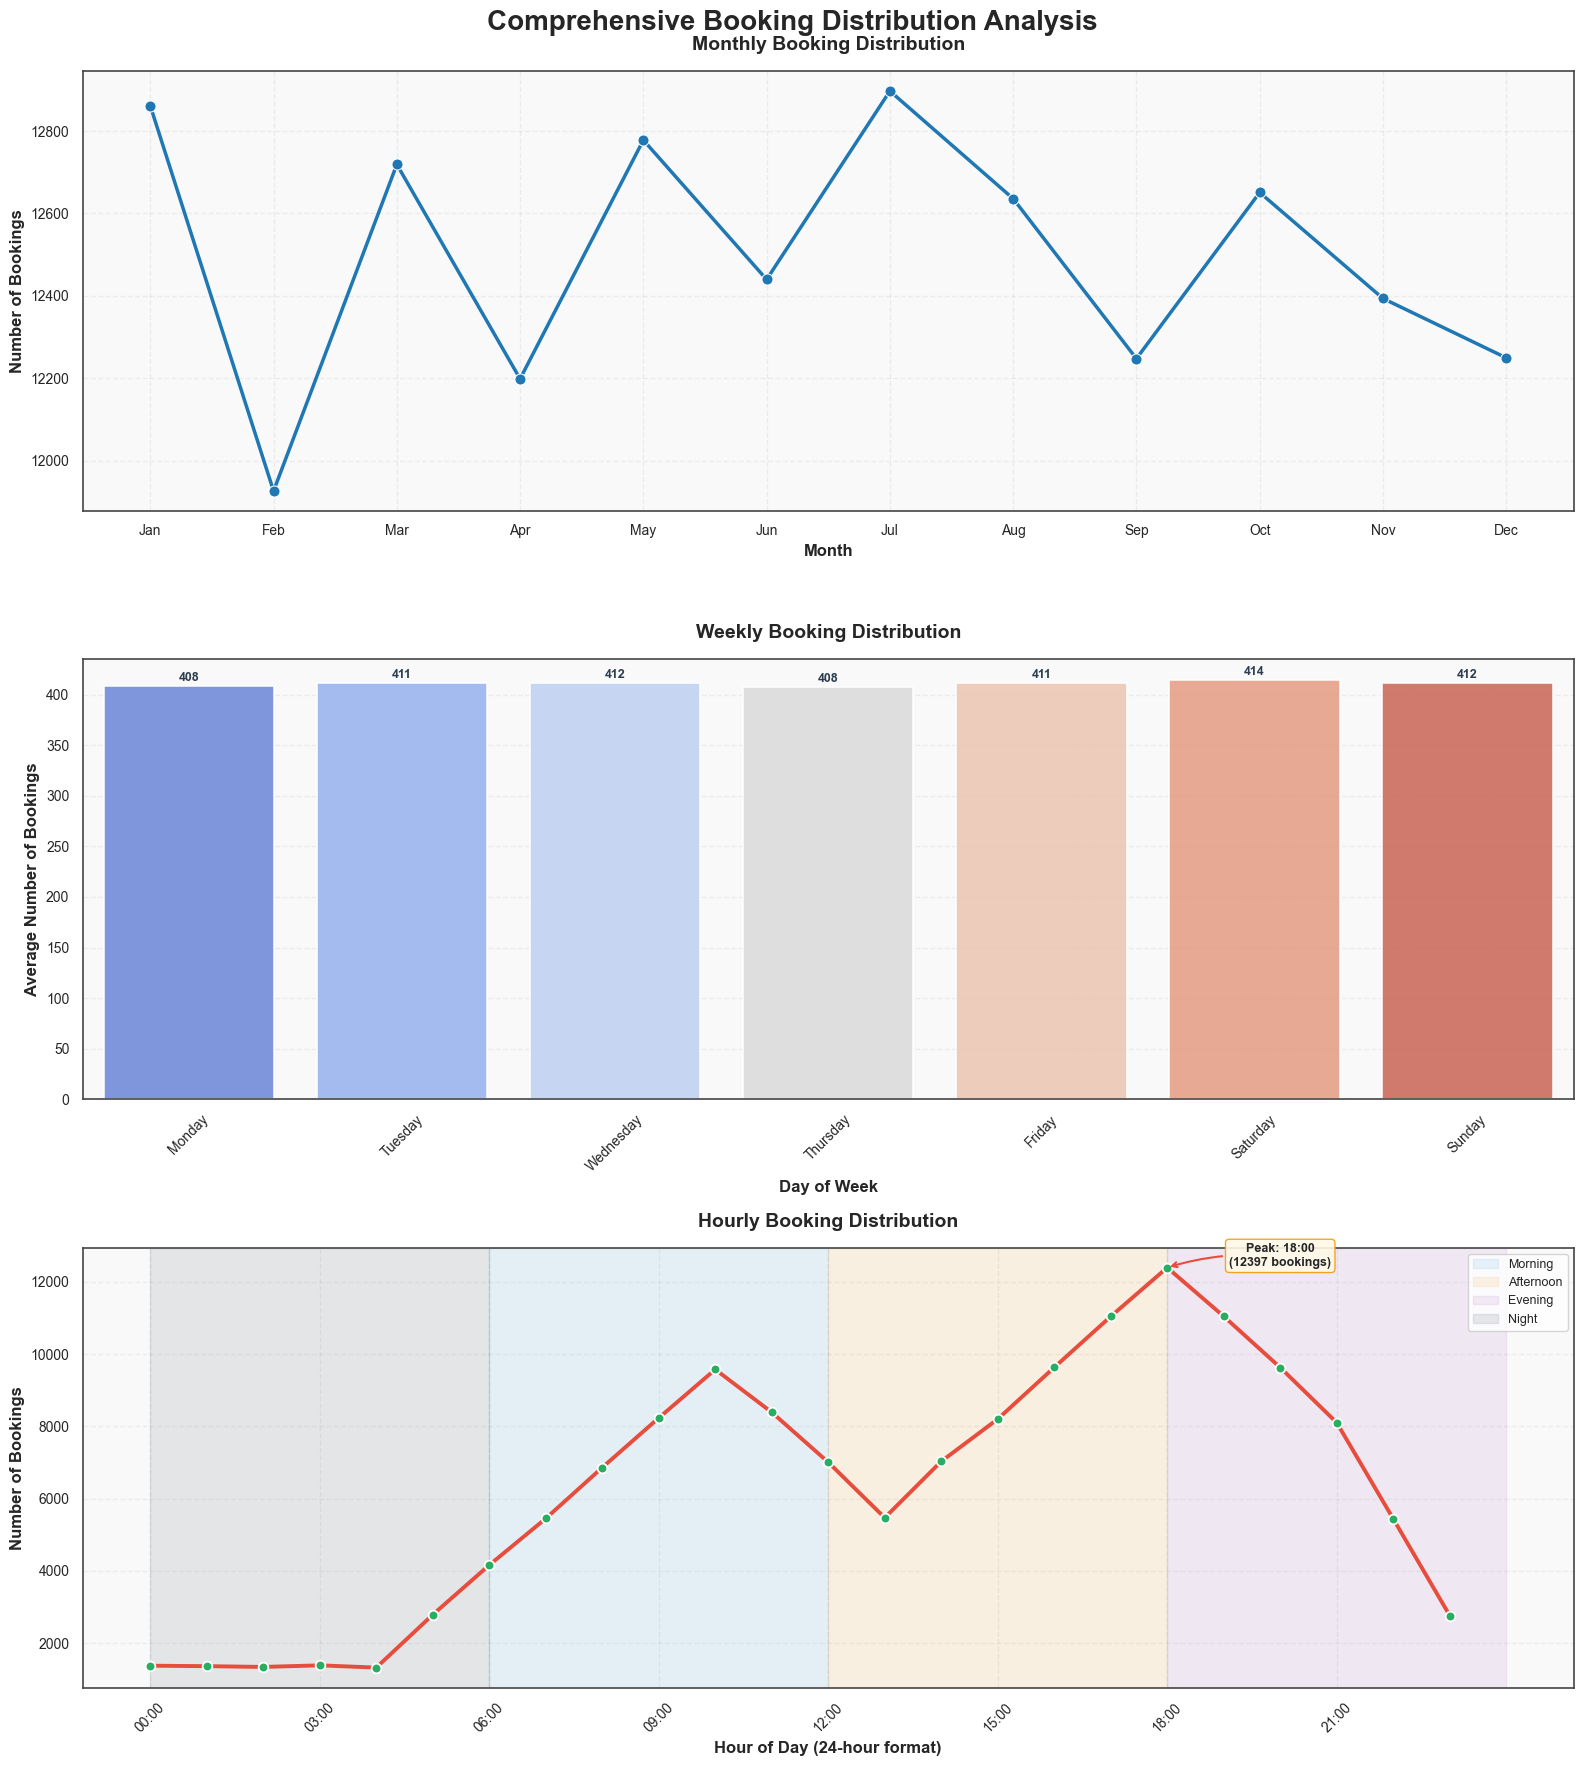

In [21]:
# Set a modern theme with consistent palette
sns.set_theme(style="whitegrid", palette="Set2")

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 18))
fig.suptitle('Comprehensive Booking Distribution Analysis', fontsize=20, fontweight='bold', y=0.98)

# ========================
# SUBPLOT 1: MONTHLY DISTRIBUTION
# ========================
month_means = df.groupby('Month').size().reindex(range(1, 13), fill_value=0)

sns.lineplot(
    x=month_means.index, 
    y=month_means.values, 
    marker='o', 
    linewidth=2.5,
    markersize=8,
    ax=axes[0],
    color='#1f77b4'  # professional blue
)

axes[0].set_xlabel("Month", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Number of Bookings", fontsize=12, fontweight='bold')
axes[0].set_title("Monthly Booking Distribution", fontsize=14, fontweight='bold', pad=15)

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_labels, fontsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_facecolor('#f9f9f9')

# ========================
# SUBPLOT 2: WEEKDAY DISTRIBUTION
# ========================
booking_perDay = df.groupby(['Date', 'Day']).size().reset_index(name='count')
mean_bookingperDay = booking_perDay.groupby('Day')['count'].mean().reset_index()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

bars = sns.barplot(
    data=mean_bookingperDay, 
    x='Day', 
    y='count',
    order=ordered_days, 
    palette="coolwarm",  # new gradient palette
    alpha=0.9,
    edgecolor='white',
    linewidth=1.2,
    ax=axes[1]
)

axes[1].set_ylabel('Average Number of Bookings', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
axes[1].set_title('Weekly Booking Distribution', fontsize=14, fontweight='bold', pad=15)

# Add value labels on bars
for bar in bars.patches:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.0f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', color='#2c3e50')

axes[1].tick_params(axis='x', labelsize=10, rotation=45)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].grid(True, axis='y', alpha=0.3, linestyle='--')
axes[1].set_facecolor('#f9f9f9')

# ========================
# SUBPLOT 3: HOURLY DISTRIBUTION
# ========================
hours = range(0, 24)
hour_counts = df['Hour'].value_counts().reindex(hours, fill_value=0)

sns.lineplot(
    x=hour_counts.index, 
    y=hour_counts.values, 
    marker='o', 
    linewidth=2.8,
    markersize=7,
    color='#e74c3c',      # deep red line
    markerfacecolor='#27ae60',  # green markers
    markeredgecolor='white',
    markeredgewidth=1.3,
    ax=axes[2]
)

axes[2].set_xlabel("Hour of Day (24-hour format)", fontsize=12, fontweight='bold')
axes[2].set_ylabel("Number of Bookings", fontsize=12, fontweight='bold')
axes[2].set_title("Hourly Booking Distribution", fontsize=14, fontweight='bold', pad=15)

# Time period shading with new softer colors
axes[2].axvspan(6, 12, alpha=0.1, color='#3498db', label='Morning')
axes[2].axvspan(12, 18, alpha=0.1, color='#f39c12', label='Afternoon')
axes[2].axvspan(18, 24, alpha=0.1, color='#9b59b6', label='Evening')
axes[2].axvspan(0, 6, alpha=0.1, color='#2c3e50', label='Night')

# Peak hour annotation
peak_hour = hour_counts.idxmax()
peak_value = hour_counts.max()
axes[2].annotate(
    f'Peak: {peak_hour:02d}:00\n({peak_value} bookings)', 
    xy=(peak_hour, peak_value), 
    xytext=(peak_hour + 2, peak_value + 50),
    fontsize=9, 
    fontweight='bold',
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", facecolor='#fef9e7', edgecolor='#f39c12', alpha=0.9),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', color='#e74c3c', lw=1.5)
)

hour_labels = [f"{h:02d}:00" for h in range(0, 24, 3)]  # Every 3 hours
axes[2].set_xticks(range(0, 24, 3))
axes[2].set_xticklabels(hour_labels, fontsize=10, rotation=45)
axes[2].tick_params(axis='y', labelsize=10)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].legend(loc='upper right', fontsize=9, frameon=True, fancybox=True)
axes[2].set_facecolor('#f9f9f9')

# ========================
# FINAL STYLING
# ========================
plt.subplots_adjust(hspace=0.4)

for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('#444444')
        spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()

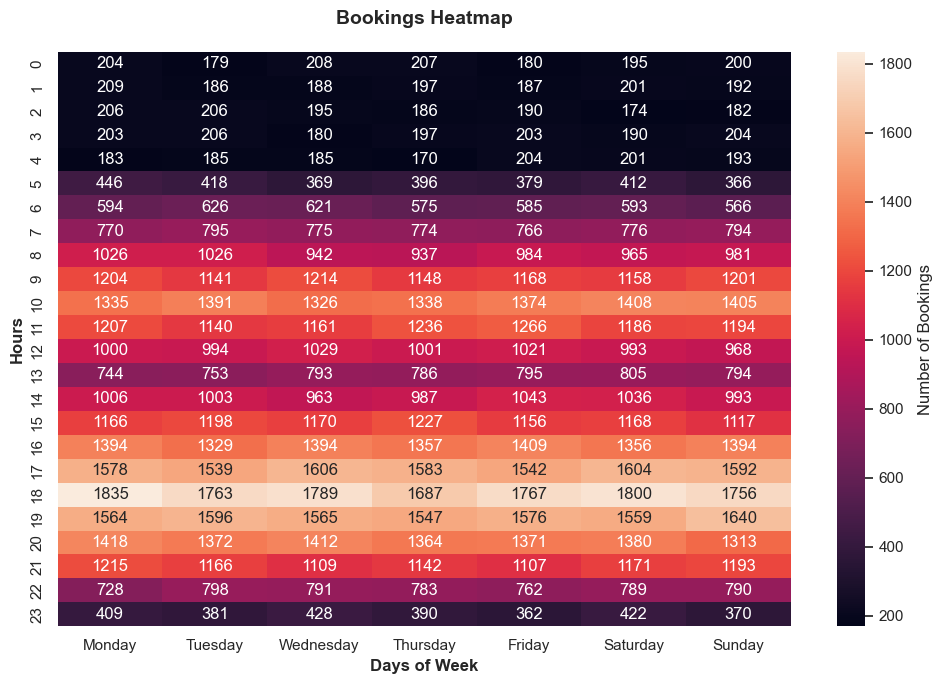

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ordered_days = [
    "Monday", 
    "Tuesday", 
    "Wednesday", 
    "Thursday", 
    "Friday", 
    "Saturday", 
    "Sunday"
]

heatmap_data = df.pivot_table(
    index='Hour',
    columns='Day',
    values='Booking ID',
    aggfunc='count'
).reindex(columns=ordered_days)

plt.figure(figsize=(10, 7))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='rocket',
    cbar_kws={'label': 'Number of Bookings'}
)

plt.xlabel("Days of Week", fontsize=12, fontweight='bold')
plt.ylabel("Hours", fontsize=12, fontweight='bold')
plt.title("Bookings Heatmap", 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

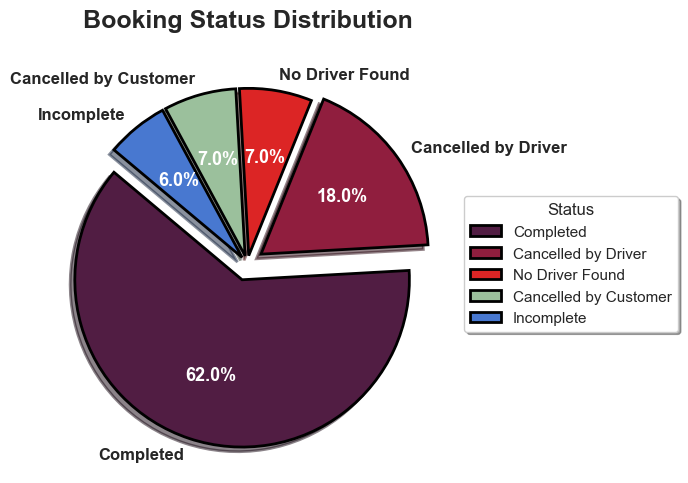

In [27]:
# Compute booking status counts
counts = df['Booking Status'].value_counts()

# Explode: highlight categories >=15% a bit more
total = counts.sum()
explode = [0.1 if (v / total) >= 0.15 else 0.05 for v in counts.values]

# Custom color palette (your given family)
custom_palette = ['#511D43', '#901E3E', '#DC2525', '#9BC09C']

# If more categories than colors, extend palette with harmonious muted shades
if len(counts) > len(custom_palette):
    extra_needed = len(counts) - len(custom_palette)
    extra_colors = sns.color_palette("muted", extra_needed).as_hex()
    colors = custom_palette + extra_colors
else:
    colors = custom_palette[:len(counts)]

# Pie chart
fig, ax = plt.subplots(figsize=(7, 5))

wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 2}
)

# Styling labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Title
ax.set_title(
    "Booking Status Distribution", 
    fontsize=18, 
    fontweight='bold',
    pad=20
)

# Legend
ax.legend(
    wedges, 
    counts.index, 
    title="Status", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1),
    fancybox=True,
    shadow=True
)

plt.tight_layout()
plt.show()

##### Booking Completion Analysis  

A significant portion of bookings are not being completed (38%). The breakdown is as follows:  

- **Cancelled by driver:** 18%  
- **Cancelled by customer:** 7%  
- **No driver found:** 7%  
- **Incomplete rides:** 6%  

Our objective is to help the company reduce these non-completion rates. As a first step, we need to investigate the underlying reasons, particularly focusing on **driver cancellations** since they represent the largest share.  


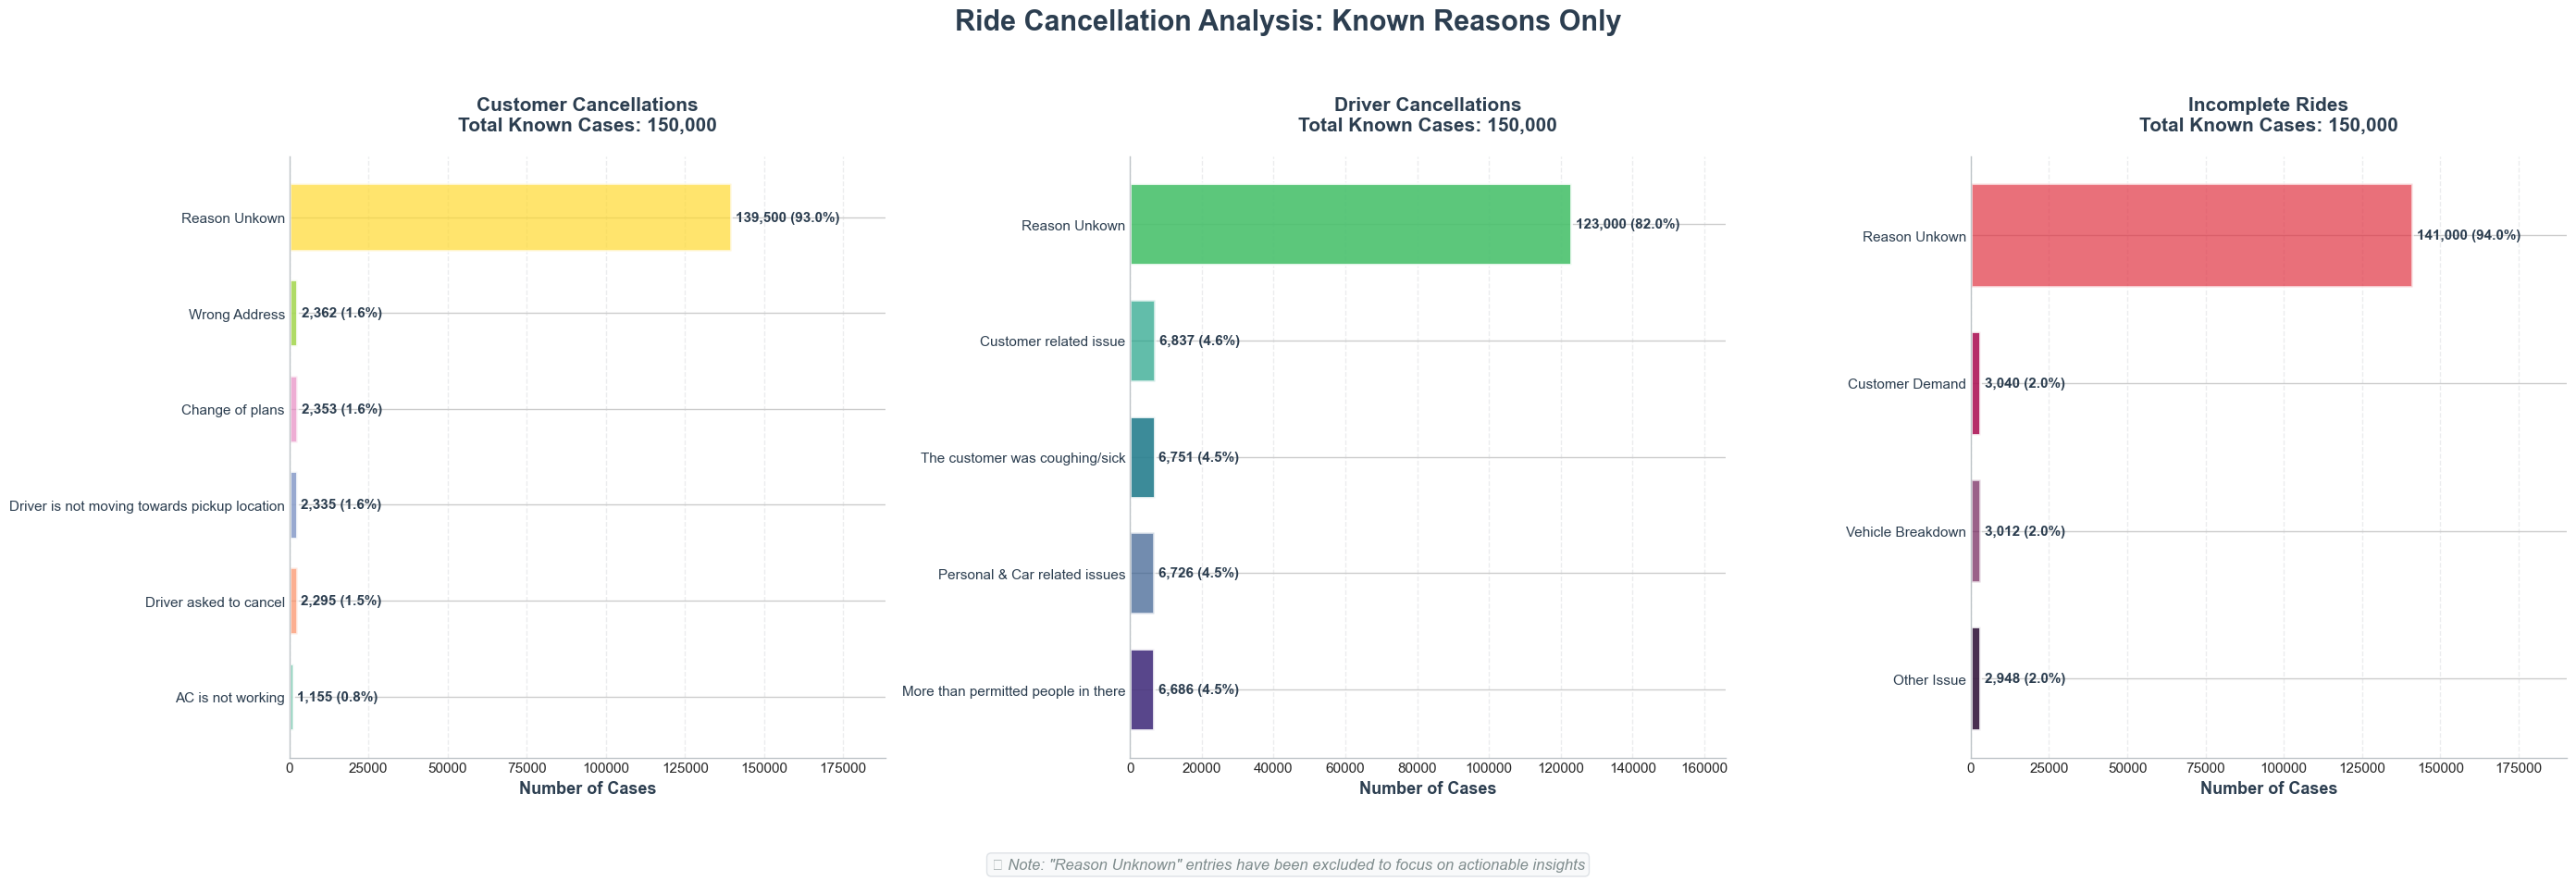

In [35]:
# Define the three columns
cols = ["Reason for cancelling by Customer", "Driver Cancellation Reason", "Incomplete Rides Reason"]
titles = ["Customer Cancellations", "Driver Cancellations", "Incomplete Rides"]

# Define different color palettes for each chart
color_palettes = [
    sns.color_palette("Set2"),      # Soft colors for customer cancellations
    sns.color_palette("viridis"),   # Blue-green for driver cancellations  
    sns.color_palette("rocket")     # Purple-pink for incomplete rides
]

# Create figure with 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(28, 10))

for i, (col, title) in enumerate(zip(cols, titles)):
    # Get value counts and EXCLUDE "Reason Unknown"
    counts = df[col].value_counts(dropna=True)
    known_counts = counts[counts.index != 'Reason Unknown']
    
    if len(known_counts) > 0:
        # Sort by count for better visualization (ascending for horizontal bars)
        known_counts_sorted = known_counts.sort_values(ascending=True)
        known_total = known_counts_sorted.sum()
        
        # Get colors for this chart
        colors = color_palettes[i][:len(known_counts_sorted)]
        
        # Create horizontal bar chart
        bars = axes[i].barh(
            range(len(known_counts_sorted)), 
            known_counts_sorted.values,
            color=colors,
            edgecolor='white',
            linewidth=2,
            alpha=0.85,
            height=0.7
        )
        
        # Add value labels on bars
        for j, (bar, value) in enumerate(zip(bars, known_counts_sorted.values)):
            percentage = (value / known_total) * 100
            # Position label at the end of the bar
            label_x = value + max(known_counts_sorted.values) * 0.01
            axes[i].text(label_x, j, 
                        f'{value:,} ({percentage:.1f}%)',
                        va='center', ha='left', 
                        fontsize=11, fontweight='bold',
                        color='#2C3E50')
        
        # Customize the y-axis (reason names)
        axes[i].set_yticks(range(len(known_counts_sorted)))
        axes[i].set_yticklabels(known_counts_sorted.index, fontsize=11, color='#2C3E50')
        
        # Customize x-axis
        axes[i].set_xlabel('Number of Cases', fontsize=13, fontweight='bold', color='#2C3E50')
        
        # Add title with total count
        axes[i].set_title(f'{title}\nTotal Known Cases: {known_total:,}', 
                         fontsize=15, fontweight='bold', color='#2C3E50', pad=20)
        
        # Style the chart
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_color('#BDC3C7')
        axes[i].spines['bottom'].set_color('#BDC3C7')
        
        # Add subtle grid for better readability
        axes[i].grid(axis='x', alpha=0.3, linestyle='--', color='#BDC3C7')
        axes[i].set_axisbelow(True)
        
        # Set x-axis limit to accommodate labels
        max_value = max(known_counts_sorted.values)
        axes[i].set_xlim(0, max_value * 1.35)
        
        # Add subtle background color to alternate bars
        for j, bar in enumerate(bars):
            if j % 2 == 0:
                bar.set_alpha(0.9)
            else:
                bar.set_alpha(0.7)
        
    else:
        # If no known reasons after filtering, show message
        axes[i].text(0.5, 0.5, 'No specific reasons\navailable after filtering\n"Reason Unknown"', 
                    ha='center', va='center', fontsize=14, fontweight='bold',
                    color='#7F8C8D', transform=axes[i].transAxes,
                    bbox=dict(boxstyle="round,pad=0.5", facecolor='#ECF0F1', 
                             edgecolor='#BDC3C7', alpha=0.8))
        axes[i].set_title(f'{title}\nNo Data Available', 
                         fontsize=15, fontweight='bold', color='#E74C3C', pad=20)
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 1)
        axes[i].axis('off')

# Add overall title
fig.suptitle('Ride Cancellation Analysis: Known Reasons Only', 
            fontsize=22, fontweight='bold', color='#2C3E50', y=0.95)

# Add note about filtering
fig.text(0.5, 0.02, 
         '📊 Note: "Reason Unknown" entries have been excluded to focus on actionable insights',
         ha='center', fontsize=12, style='italic', color='#7F8C8D',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='#F8F9FA', edgecolor='#DEE2E6'))

# Set clean background
fig.patch.set_facecolor('white')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.08, 1, 0.92])
plt.show()

# Optional: Save the figure
# plt.savefig('clean_cancellation_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')

In [36]:
df.head(1)

,Month,Day,Hour,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time
0,1,Monday,0,2024-01-01,00:19:34,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,...,0.0,Reason Unkown,0.0,Reason Unkown,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34


**Time is a very important factor. Let'sdivide it into 4 time zones:**

- Zone 1: 6am to 12pm Morning
- Zone 2: 12pm to 6pm Afternoon
- Zone 3: 6pm to 12am Evenings
- Zone 4: 12 am to 6 am Late nights

In [37]:
#we are using 24hr format
def getTimebyZone(Hour):
    if Hour >=6 and Hour <=12:
        return 'Morning'
    elif Hour>12 and Hour<=18:
        return 'Afternoon'
    elif Hour >18 and Hour<=24:
        return 'Evenings'
    elif Hour >=0 and Hour <6:
        return 'LateNights'

        
df['TimeZone'] = df['Hour'].apply(getTimebyZone)      

*Checking for the rush hour, which is usually between 7 AM - 10 AM, evening 3 PM to 6 PM*

In [38]:
def isRushHour(Hour):
    if Hour >=7 and Hour<=10:
        return 1
    elif Hour >= 15 and Hour<= 18:
        return 1
    else:
        return 0

df['RushHour'] = df['Hour'].apply(isRushHour)

In [39]:
df[['TimeZone','Hour','RushHour']]

,TimeZone,Hour,RushHour
0,LateNights,0,0
1,LateNights,1,0
2,LateNights,1,0
3,LateNights,1,0
4,LateNights,1,0
...,...,...,...
149995,Evenings,22,0
149996,Evenings,23,0
149997,Evenings,23,0
149998,Evenings,23,0


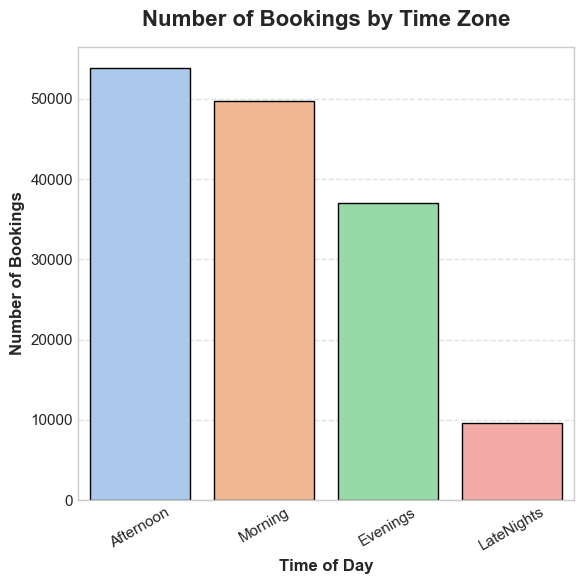

In [43]:
plt.figure(figsize=(6,6))

sns.countplot(
    x='TimeZone',
    data=df,
    order=df['TimeZone'].value_counts().index,
    palette='pastel',
    edgecolor='black'
)

# Title and labels
plt.title("Number of Bookings by Time Zone", fontsize=16, fontweight='bold', pad=15)
plt.ylabel("Number of Bookings", fontsize=12, fontweight='bold')
plt.xlabel("Time of Day", fontsize=12, fontweight='bold')

# Rotate x-ticks for better readability (if labels are long)
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)

# Add gridlines on y-axis for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**The afternoon time zone has the highest volume of bookings, followed by morning, with Late night having the least. This insight can help ride-hailing platforms better allocate driver availability and manage operational resources more efficiently.**


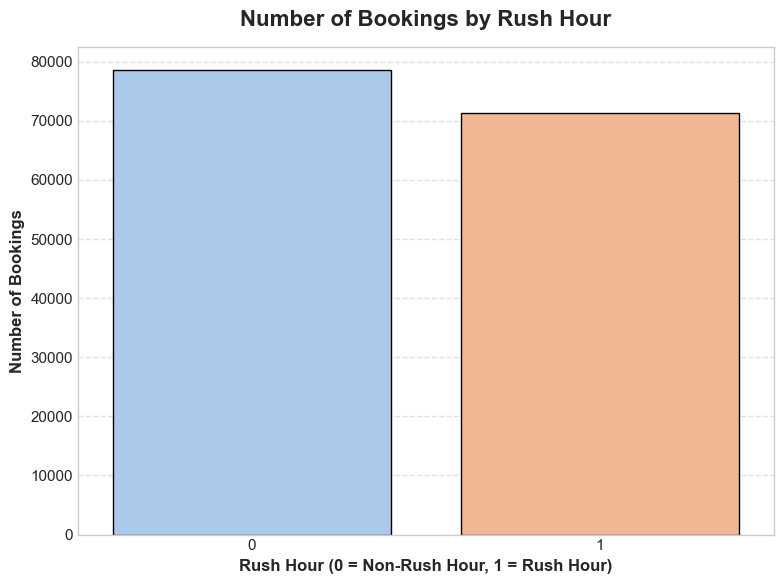

Value Counts for RushHour:

RushHour
0    78602
1    71398
Name: count, dtype: int64


In [45]:
### Rush Hour Booking
# Plotting
plt.figure(figsize=(8, 6))

sns.countplot(
    x='RushHour',
    data=df,
    order=df['RushHour'].value_counts().index,
    palette='pastel',
    edgecolor='black'
)

# Title and labels
plt.title("Number of Bookings by Rush Hour", fontsize=16, fontweight='bold', pad=15)
plt.ylabel("Number of Bookings", fontsize=12, fontweight='bold')
plt.xlabel("Rush Hour (0 = Non-Rush Hour, 1 = Rush Hour)", fontsize=12, fontweight='bold')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display plot
plt.tight_layout()
plt.show()

# Print counts
print("Value Counts for RushHour:\n")
print(df['RushHour'].value_counts())


#### Most Preferred Uber Vehicle Types

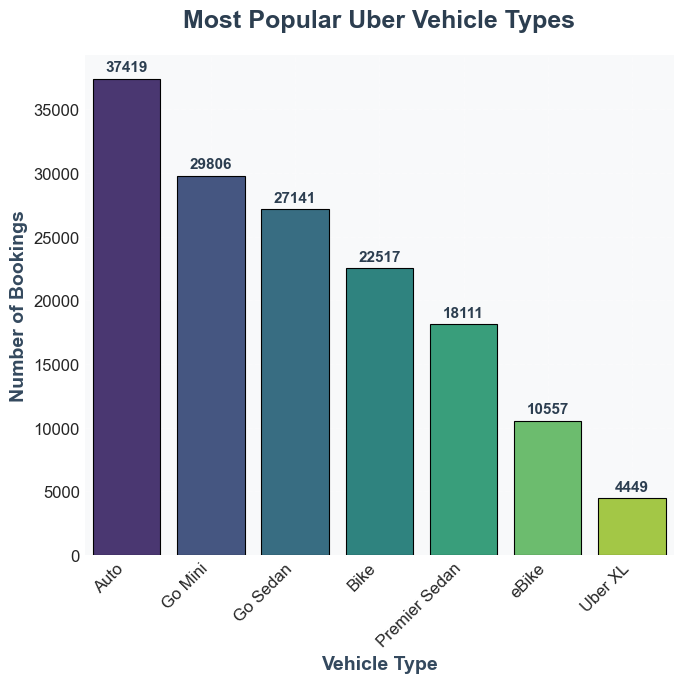

In [47]:
# Set the style and color palette
plt.style.use('seaborn-v0_8-darkgrid')  # Modern grid style
sns.set_palette("husl")  # Vibrant color palette

# Create figure with custom size
plt.figure(figsize=(7,7))

# Create the count plot with enhanced styling
ax = sns.countplot(
    x='Vehicle Type', 
    data=df, 
    order=df['Vehicle Type'].value_counts().index,
    palette='viridis',  # Professional color scheme
    edgecolor='black',  # Add borders to bars
    linewidth=0.8
)

# Customize the plot
plt.title("Most Popular Uber Vehicle Types", 
          fontsize=18, 
          fontweight='bold', 
          pad=20,
          color='#2c3e50')

plt.ylabel("Number of Bookings", 
           fontsize=14, 
           fontweight='semibold',
           color='#34495e')

plt.xlabel("Vehicle Type", 
           fontsize=14, 
           fontweight='semibold',
           color='#34495e')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(df['Vehicle Type'].value_counts().values):
    ax.text(i, v + max(df['Vehicle Type'].value_counts()) * 0.01, 
            str(v), 
            ha='center', 
            va='bottom',
            fontsize=11,
            fontweight='bold',
            color='#2c3e50')

# Customize grid
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

#### Top Pickup location vs Least Pickup Location

In [55]:
location_counts = df['Pickup Location'].value_counts()

top_10 = location_counts.head(5)
least_10 = location_counts.tail(5)

print("Top 10 location", top_10)
print("Top 10 location", least_10)

Top 10 location Pickup Location
Khandsa            949
Barakhamba Road    946
Saket              931
Badarpur           921
Pragati Maidan     920
Name: count, dtype: int64
Top 10 location Pickup Location
Mandi House         800
Noida Sector 18     799
Laxmi Nagar         797
Ashok Vihar         796
Ghitorni Village    790
Name: count, dtype: int64


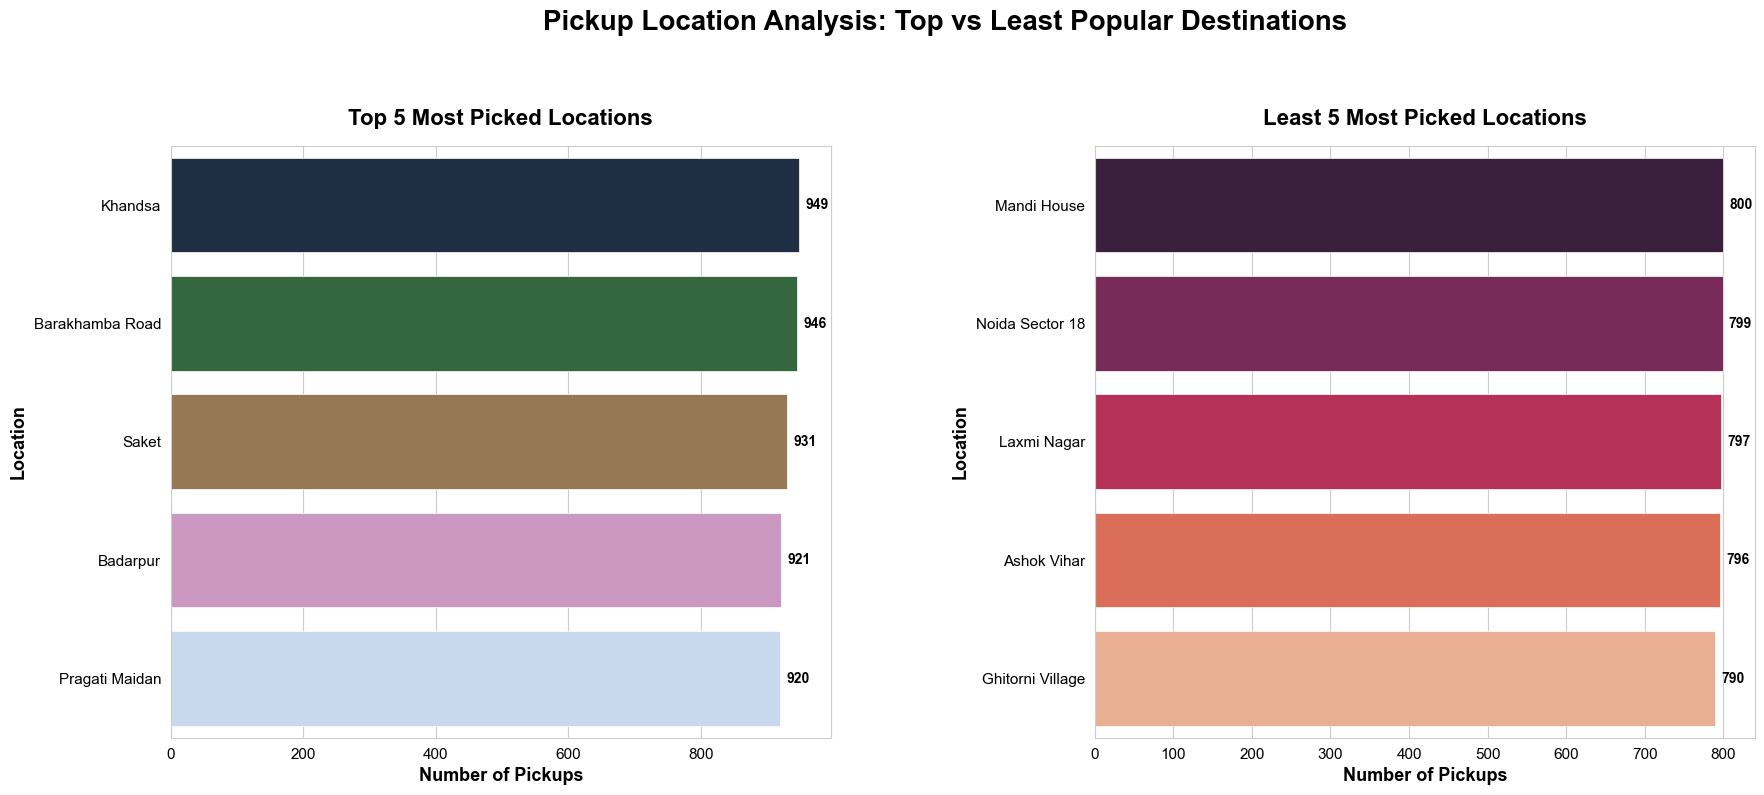

In [58]:
# Use light theme
plt.style.use('default')
sns.set_style("whitegrid")

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Left subplot - Top 5 locations (cubehelix)
sns.barplot(
    x=top_10.values, 
    y=top_10.index, 
    palette='cubehelix',  
    ax=ax1,
    edgecolor='white',
    linewidth=0.5
)

ax1.set_title("Top 5 Most Picked Locations", fontsize=16, fontweight='bold', color='black', pad=15)
ax1.set_xlabel("Number of Pickups", fontsize=13, fontweight='semibold', color='black')
ax1.set_ylabel("Location", fontsize=13, fontweight='semibold', color='black')
ax1.tick_params(colors='black', labelsize=11)

for i, v in enumerate(top_10.values):
    ax1.text(v + max(top_10.values)*0.01, i, f'{v:,}', va='center', ha='left', color='black', fontweight='bold', fontsize=10)

# Right subplot - Least 5 locations (rocket)
sns.barplot(
    x=least_10.values, 
    y=least_10.index, 
    palette='rocket',  
    ax=ax2,
    edgecolor='white',
    linewidth=0.5
)

ax2.set_title("Least 5 Most Picked Locations", fontsize=16, fontweight='bold', color='black', pad=15)
ax2.set_xlabel("Number of Pickups", fontsize=13, fontweight='semibold', color='black')
ax2.set_ylabel("Location", fontsize=13, fontweight='semibold', color='black')
ax2.tick_params(colors='black', labelsize=11)

for i, v in enumerate(least_10.values):
    ax2.text(v + max(least_10.values)*0.01, i, f'{v:,}', va='center', ha='left', color='black', fontweight='bold', fontsize=10)

# Main title
fig.suptitle('Pickup Location Analysis: Top vs Least Popular Destinations', fontsize=20, fontweight='bold', color='black', y=1.02)

# Adjust layout to prevent overlapping
plt.subplots_adjust(top=0.85, wspace=0.4, left=0.07, right=0.95)
plt.show()

This visualization compares the top five and bottom five pickup locations based on Uber booking counts. On one side, areas like Khandsa, Barakhamba Road, Kanhaiya Nagar, Madipur, and Subhash Chowk emerge as high-demand hubs, likely due to their dense population or significance as travel centers. On the other side, locations such as Faridabad Sector 15, Arjangarh, Chirag Delhi, Old Gurgaon, and Vinobapuri show the lowest activity, indicating zones with limited demand or reduced Uber presence. Together, these insights highlight where Uber can optimize driver allocation in high-demand regions and explore strategic expansion or marketing opportunities in underutilized areas.

#### Preferred Payment Methods for Uber Bookings

In [59]:
payment_methods = df['Payment Method'].value_counts()
payment_methods

Payment Method
Unknown        48000
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

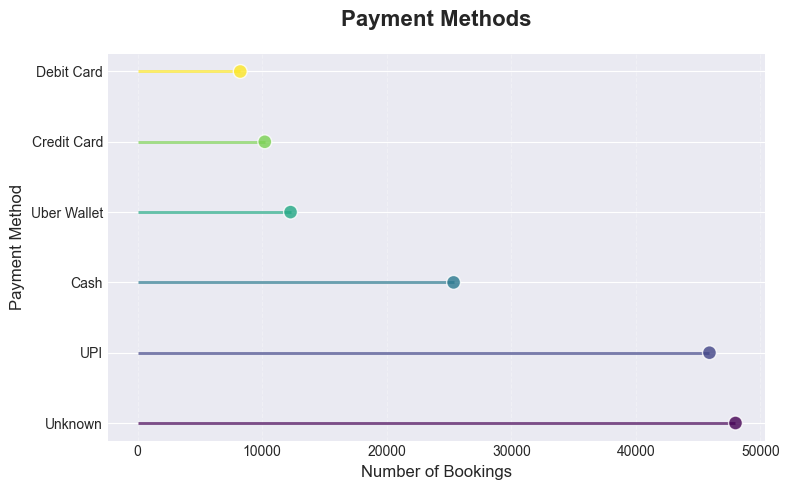

In [62]:
# Create the lollipop chart
plt.figure(figsize=(8, 5))

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(payment_methods)))

# Create the stems (lines)
for i, (method, value) in enumerate(zip(payment_methods.index, payment_methods.values)):
    plt.hlines(y=method, xmin=0, xmax=value, 
               colors=colors[i], alpha=0.7, linewidth=2)

# Create the lollipops (circles)
plt.scatter(payment_methods.values, payment_methods.index, 
            c=colors, s=100, alpha=0.8, zorder=5, edgecolors='white', linewidth=1)

# Customize the plot
plt.title("Payment Methods", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Number of Bookings", fontsize=12)
plt.ylabel("Payment Method", fontsize=12)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

- The majority of users prefer UPI (Unified Payments Interface) for their Uber rides, making it the most popular payment method by a significant margin. Cash payments come next, showing that traditional payment methods are still in use.

- Other payment options, such as Uber Wallet, Credit Card, and Debit Card, are used by fewer users. This may be due to users’ preference for digital wallets or the convenience of UPI integration.

- Insight: Uber can focus on maintaining seamless UPI support while also exploring strategies to incentivize wallet and card usage, thereby diversifying transaction channels.

#### Booking Cancellation types Rate Analysis by Hour

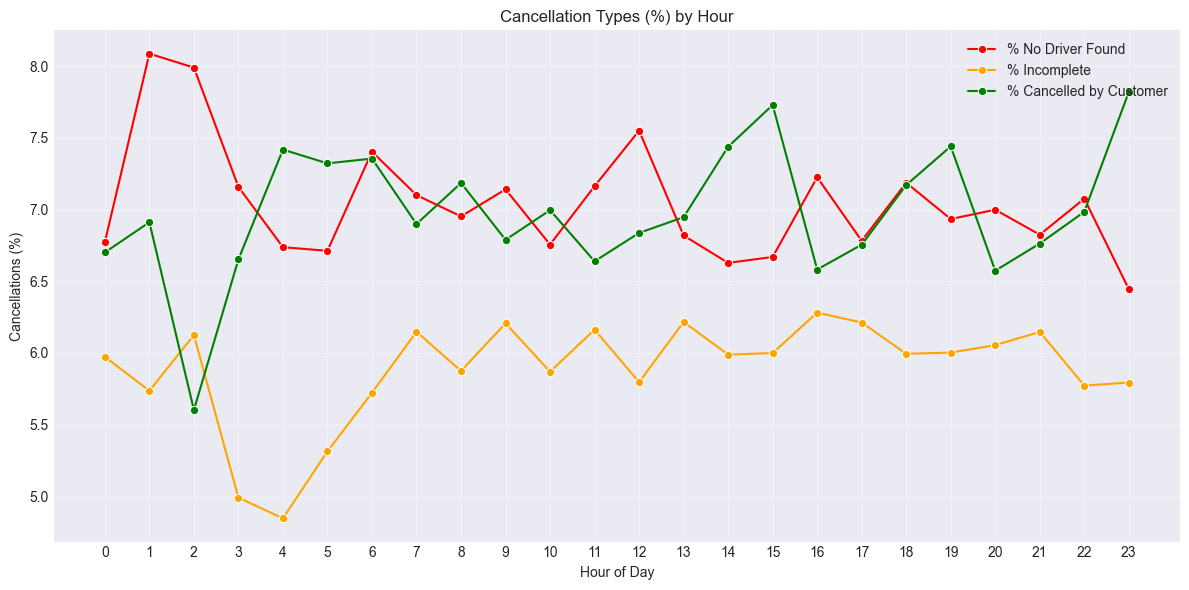

In [63]:
# Define the cancellation types
cancellation_types = {
    'No Driver Found': 'red',
    'Incomplete': 'orange',
    'Cancelled by Customer': 'green'
}


# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate and plot each cancellation type
for status, color in cancellation_types.items():
    # Filter data for this booking status
    status_df = df[df['Booking Status'] == status]
    
    # Count cancellations per hour
    status_counts = status_df['Hour'].value_counts().reindex(range(24), fill_value=0)
    
    # Compute percentage cancellations
    status_rate = (status_counts / hour_counts.replace(0, np.nan) * 100).fillna(0)
    
    # Plot the line
    sns.lineplot(x=status_rate.index, y=status_rate.values,
                marker='o', label=f"% {status}", color=color, ax=ax1)

# Customize the plot
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Cancellations (%)")
ax1.set_title("Cancellation Types (%) by Hour")
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)

# Position legend
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))

# Adjust layout and show
plt.tight_layout()
plt.show()

* at 2-3 AM: No Driver Found Lowest, Customer Cancellations Rate decreases significantly
* at 3-4 AM: Incomplete Rides Lowest

#### Cancellation Time Zones

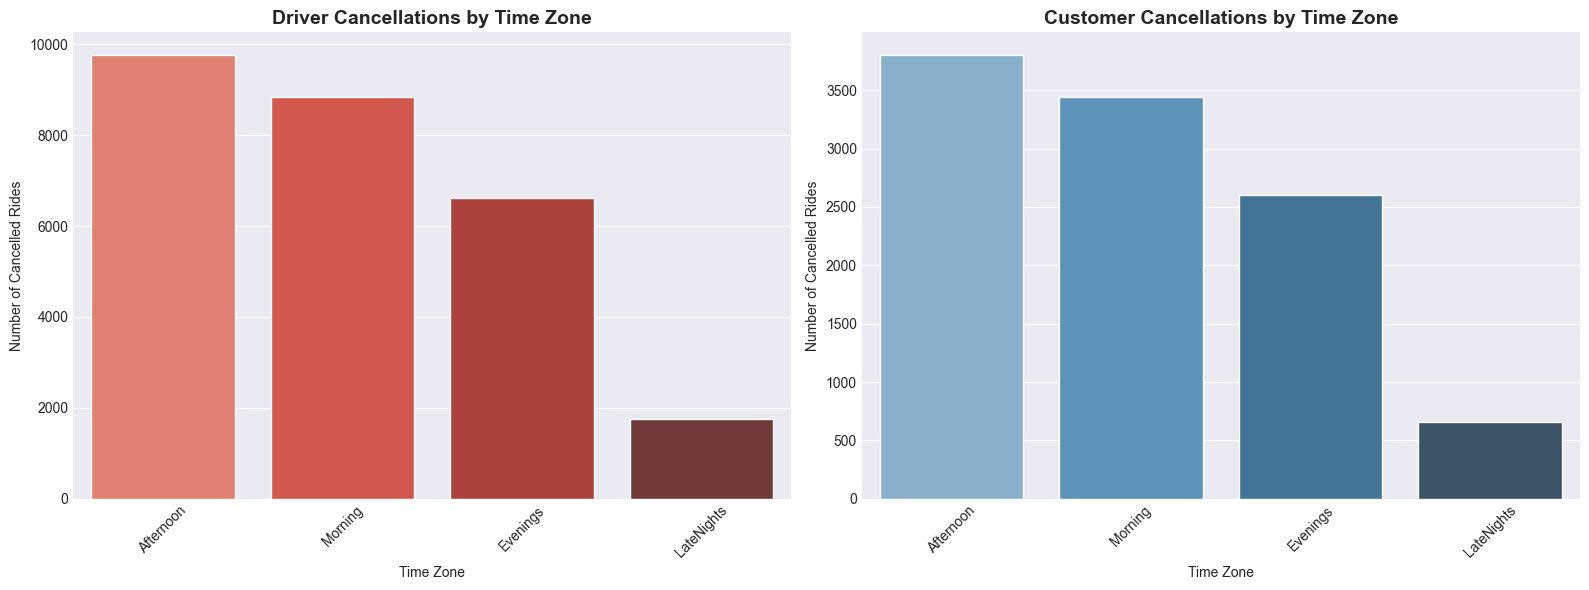

In [64]:
# Prepare data for driver cancellations
cancelled_df_driver = df[df['Cancelled Rides by Driver'] == 1]
cancelled_counts_driver = cancelled_df_driver['TimeZone'].value_counts()

# Prepare data for customer cancellations
cancelled_df_customer = df[df['Cancelled Rides by Customer'] == 1]
cancelled_counts_customer = cancelled_df_customer['TimeZone'].value_counts()

# Create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Driver cancellations plot (left subplot)
sns.barplot(x=cancelled_counts_driver.index, y=cancelled_counts_driver.values, 
            palette='Reds_d', ax=ax1)
ax1.set_title('Driver Cancellations by Time Zone', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time Zone')
ax1.set_ylabel('Number of Cancelled Rides')
ax1.tick_params(axis='x', rotation=45)

# Customer cancellations plot (right subplot)
sns.barplot(x=cancelled_counts_customer.index, y=cancelled_counts_customer.values, 
            palette='Blues_d', ax=ax2)
ax2.set_title('Customer Cancellations by Time Zone', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time Zone')
ax2.set_ylabel('Number of Cancelled Rides')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Driver Cancellations by Time Zone**

* Most cancellations occur during **Afternoon** and **Morning**, followed by **Evenings**.
* **Late nights** have the fewest driver cancellations.
* This may reflect **peak hours** when demand is high and drivers are more likely to cancel due to **traffic, fatigue, or overbooking**.

**Customer Cancellations by Time Zone**

* **Afternoon** and **Morning** dominate customer cancellation times as well.
* The trend **resembles driver cancellation patterns**, indicating common timing pressures or service mismatches during these periods.
* **Late nights** see significantly fewer customer cancellations.



#### Top 10 Drop Destinations in Weekdays and Weekends

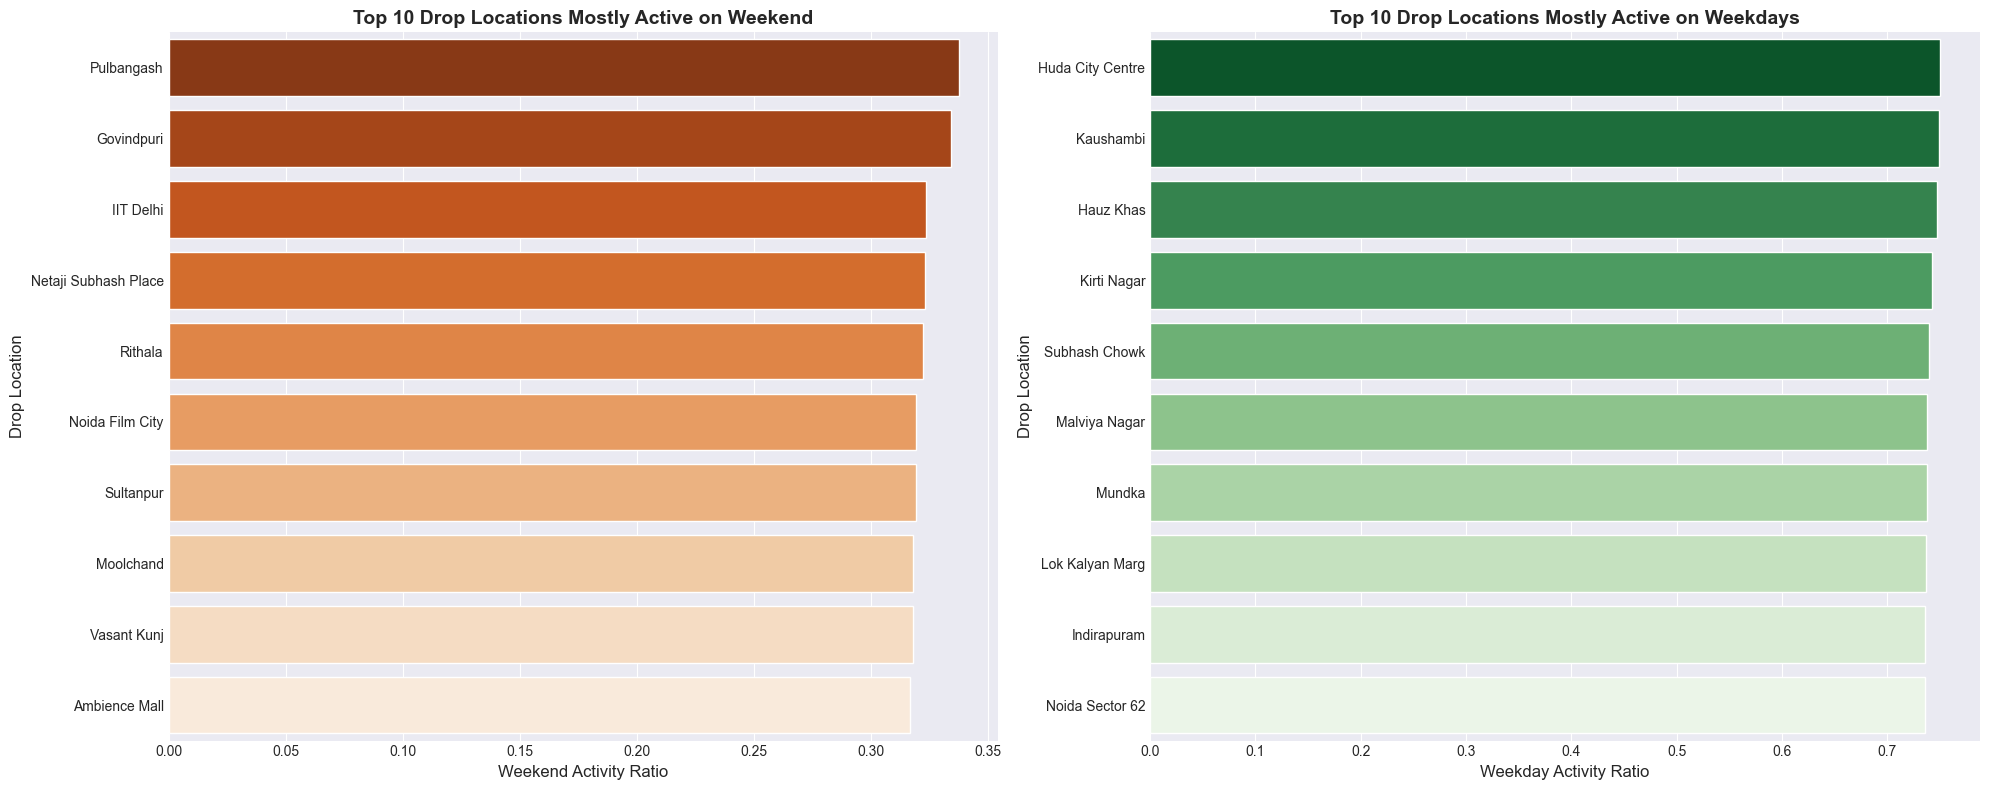

Mostly weekend locations: 37

Top weekend locations:
Day_Type              Weekday  Weekend  Total  Weekend_Ratio  Weekday_Ratio
Drop Location                                                              
Pulbangash                547      279    826       0.337772       0.662228
Govindpuri                557      280    837       0.334528       0.665472
IIT Delhi                 579      277    856       0.323598       0.676402
Netaji Subhash Place      580      277    857       0.323221       0.676779
Rithala                   580      276    856       0.322430       0.677570

Mostly weekday locations: 176

Top weekday locations:
Day_Type          Weekday  Weekend  Total  Weekend_Ratio  Weekday_Ratio
Drop Location                                                          
Huda City Centre      581      193    774       0.249354       0.750646
Kaushambi             644      215    859       0.250291       0.749709
Hauz Khas             667      225    892       0.252242       0.747758


In [65]:
# Prepare the data (assuming your previous code has run)
weekend = ['Saturday', 'Sunday']
df['Day_Type'] = df['Day'].apply(lambda x: 'Weekend' if x in weekend else 'Weekday')

location_activity = df.groupby(['Drop Location', 'Day_Type']).size().unstack(fill_value=0)
location_activity['Total'] = location_activity['Weekday'] + location_activity['Weekend']
location_activity['Weekend_Ratio'] = location_activity['Weekend'] / location_activity['Total']
location_activity['Weekday_Ratio'] = location_activity['Weekday'] / location_activity['Total']

# Filter locations
mostly_weekend = location_activity[location_activity['Weekend_Ratio'] > 0.3].sort_values(by='Weekend_Ratio', ascending=False)
mostly_weekday = location_activity[location_activity['Weekday_Ratio'] > 0.3].sort_values(by='Weekday_Ratio', ascending=False)

# Top 10 locations for each category
top_weekend = mostly_weekend['Weekend_Ratio'].head(10)
top_weekday = mostly_weekday['Weekday_Ratio'].head(10)

# Create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Weekend activity plot (left subplot)
sns.barplot(x=top_weekend.values, y=top_weekend.index, 
            palette="Oranges_r", ax=ax1)
ax1.set_xlabel("Weekend Activity Ratio", fontsize=12)
ax1.set_ylabel("Drop Location", fontsize=12)
ax1.set_title("Top 10 Drop Locations Mostly Active on Weekend", 
              fontsize=14, fontweight='bold')

# Weekday activity plot (right subplot)
sns.barplot(x=top_weekday.values, y=top_weekday.index, 
            palette="Greens_r", ax=ax2)
ax2.set_xlabel("Weekday Activity Ratio", fontsize=12)
ax2.set_ylabel("Drop Location", fontsize=12)
ax2.set_title("Top 10 Drop Locations Mostly Active on Weekdays", 
              fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Mostly weekend locations: {mostly_weekend.shape[0]}")
print("\nTop weekend locations:")
print(mostly_weekend.head())

print(f"\nMostly weekday locations: {mostly_weekday.shape[0]}")
print("\nTop weekday locations:")
print(mostly_weekday.head())

#### Most Popular Drop Locations by Day of Week

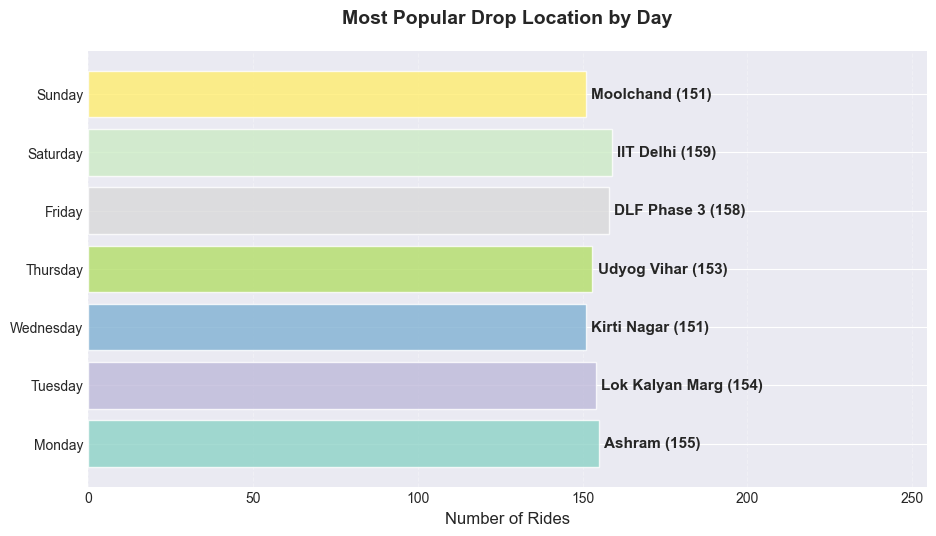

OVERALL STATISTICS
Total rides analyzed: 150,000
Total unique drop locations: 176
Most popular location overall: Ashram
Most popular location rides: 936

Rides per day:
  Monday: 21,644 rides (14.4%)
  Tuesday: 21,391 rides (14.3%)
  Wednesday: 21,413 rides (14.3%)
  Thursday: 21,215 rides (14.1%)
  Friday: 21,397 rides (14.3%)
  Saturday: 21,542 rides (14.4%)
  Sunday: 21,398 rides (14.3%)


In [67]:
# Remove rows with null values in key columns
df_clean = df[['Drop Location', 'Day']].dropna()

# Get top drop location for each day
top_locations_by_day = []
for Day in ordered_days:
    day_data = df_clean[df_clean['Day'] == Day]
    if not day_data.empty:
        top_location = day_data['Drop Location'].value_counts().index[0]
        count = day_data['Drop Location'].value_counts().iloc[0]
        top_locations_by_day.append({
            'Day': Day,
            'Top_Location': top_location,
            'Count': count
        })

top_df = pd.DataFrame(top_locations_by_day)

# Create visualization bar plot with different colors
fig = plt.figure(figsize=(10, 6))

# Define a color palette for each day
colors = plt.cm.Set3(np.linspace(0, 1, len(top_df)))  # Using Set3 colormap for distinct colors

# Horizontal bar chart for better readability
ax = plt.subplot(1, 1, 1)
if not top_df.empty:
    y_pos = np.arange(len(top_df))
    bars = ax.barh(y_pos, top_df['Count'], color=colors, alpha=0.8, edgecolor='white', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_df['Day'])
    ax.set_xlabel('Number of Rides', fontsize=12)
    ax.set_title('Most Popular Drop Location by Day', fontsize=14, pad=20, fontweight='bold')
    
    # Add location names and counts to the right of bars
    for i, (bar, location, count) in enumerate(zip(bars, top_df['Top_Location'], top_df['Count'])):
        # Truncate long location names
        display_name = location if len(location) <= 30 else location[:27] + "..."
        ax.text(bar.get_width() + max(top_df['Count']) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{display_name} ({count:,})', va='center', ha='left', fontsize=11, fontweight='bold')
    
    # Extend x-axis to make room for text
    ax.set_xlim(0, max(top_df['Count']) * 1.6)
    
    # Add grid for better readability
    ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout(pad=3.0)
plt.show()

# Print overall statistics
print("=" * 80)
print("OVERALL STATISTICS")
print("=" * 80)
print(f"Total rides analyzed: {len(df_clean):,}")
print(f"Total unique drop locations: {df_clean['Drop Location'].nunique():,}")
print(f"Most popular location overall: {df_clean['Drop Location'].value_counts().index[0]}")
print(f"Most popular location rides: {df_clean['Drop Location'].value_counts().iloc[0]:,}")

# Day-wise ride distribution
print(f"\nRides per day:")
day_counts = df_clean['Day'].value_counts().reindex(ordered_days)
for day, count in day_counts.items():
    if pd.notna(count):
        percentage = (count / len(df_clean)) * 100
        print(f"  {day}: {count:,} rides ({percentage:.1f}%)")

### Other Analysis

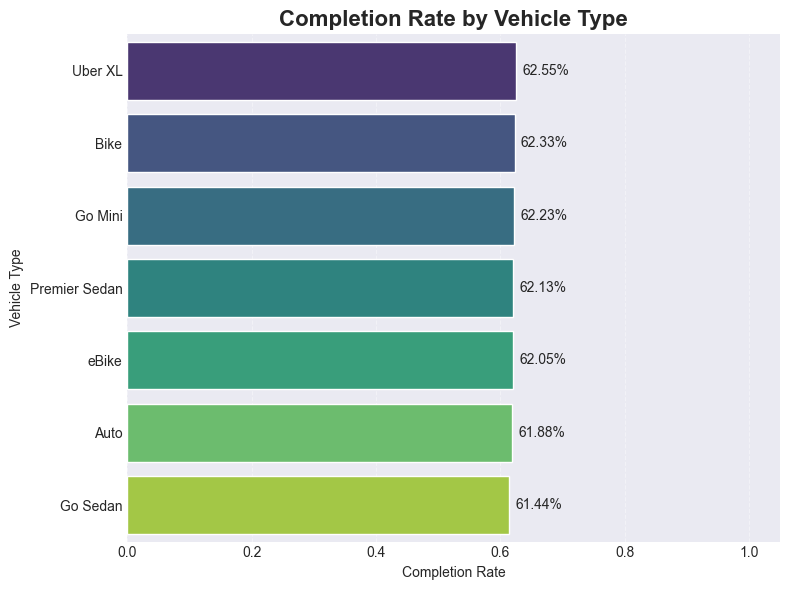

In [68]:
# Completion rate by Vehicle Type


# Define outcome if not present
if 'Outcome' not in df.columns:
    def _outcome(row):
        if row.get('Booking Status') == 'Completed':
            return 'Completed'
        if row.get('Booking Status') == 'No Driver Found':
            return 'No Driver Found'
        if row.get('Cancelled Rides by Driver', 0) == 1:
            return 'Cancelled by Driver'
        if row.get('Cancelled Rides by Customer', 0) == 1:
            return 'Cancelled by Customer'
        if row.get('Incomplete Rides', 0) == 1:
            return 'Incomplete'
        return 'Other'
    df['Outcome'] = df.apply(_outcome, axis=1)

vt_counts = df.groupby('Vehicle Type').size()
vt_completed = df[df['Outcome'] == 'Completed'].groupby('Vehicle Type').size()
vt_rate = (vt_completed / vt_counts).fillna(0).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=vt_rate.values, y=vt_rate.index, palette='viridis')
plt.title('Completion Rate by Vehicle Type', fontsize=16, fontweight='bold')
plt.xlabel('Completion Rate')
plt.ylabel('Vehicle Type')
for i, v in enumerate(vt_rate.values):
    plt.text(v + 0.01, i, f"{v:.2%}", va='center')
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

* Vehicle types show clear variability in completion rates, indicating service reliability differs by category.
* Focus operational levers (driver allocation, pricing, incentives) on low-performing vehicle types to lift completions.

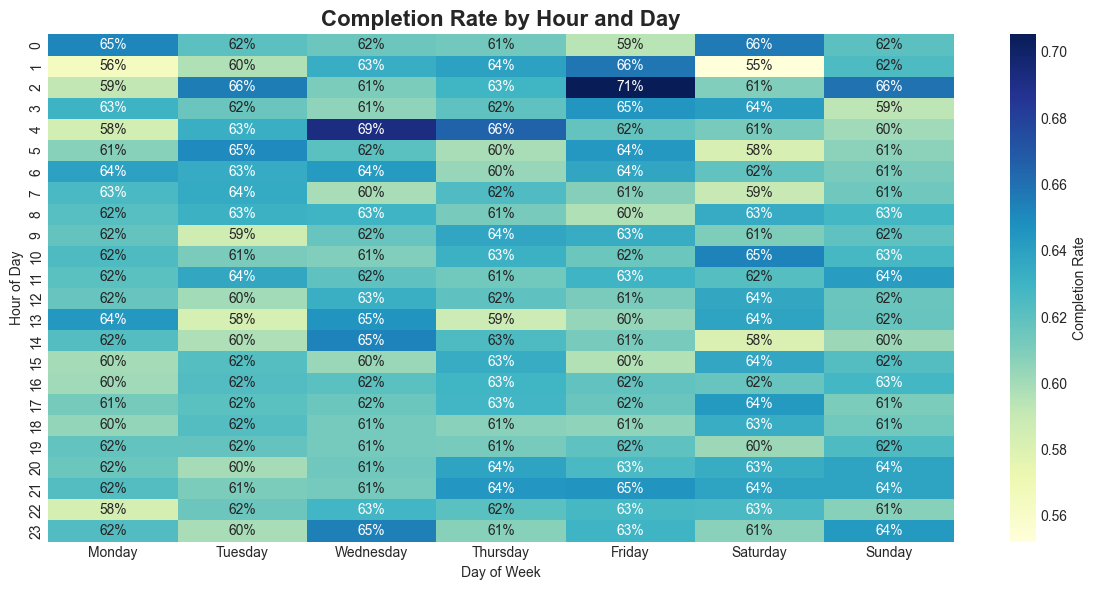

In [69]:
# Completion rate heatmap by Hour x Day


# Ensure Outcome exists
if 'Outcome' not in df.columns:
    def _outcome(row):
        if row.get('Booking Status') == 'Completed':
            return 'Completed'
        if row.get('Booking Status') == 'No Driver Found':
            return 'No Driver Found'
        if row.get('Cancelled Rides by Driver', 0) == 1:
            return 'Cancelled by Driver'
        if row.get('Cancelled Rides by Customer', 0) == 1:
            return 'Cancelled by Customer'
        if row.get('Incomplete Rides', 0) == 1:
            return 'Incomplete'
        return 'Other'
    df['Outcome'] = df.apply(_outcome, axis=1)

ordered_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

grp = df.groupby(['Hour','Day'])
comp_rate = (grp.apply(lambda g: (g['Outcome']== 'Completed').mean())
             .unstack('Day')
             .reindex(columns=ordered_days)
             .reindex(index=range(24)))

plt.figure(figsize=(12,6))
sns.heatmap(comp_rate, cmap='YlGnBu', annot=True, fmt='.0%', cbar_kws={'label':'Completion Rate'})
plt.title('Completion Rate by Hour and Day', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()


* Completion rates fluctuate across the day-week grid, with visible off-peak stability and peak-time dips.
* Target peak-hour gaps (e.g., afternoon/evening on busy weekdays) with supply balancing or surge adjustments.

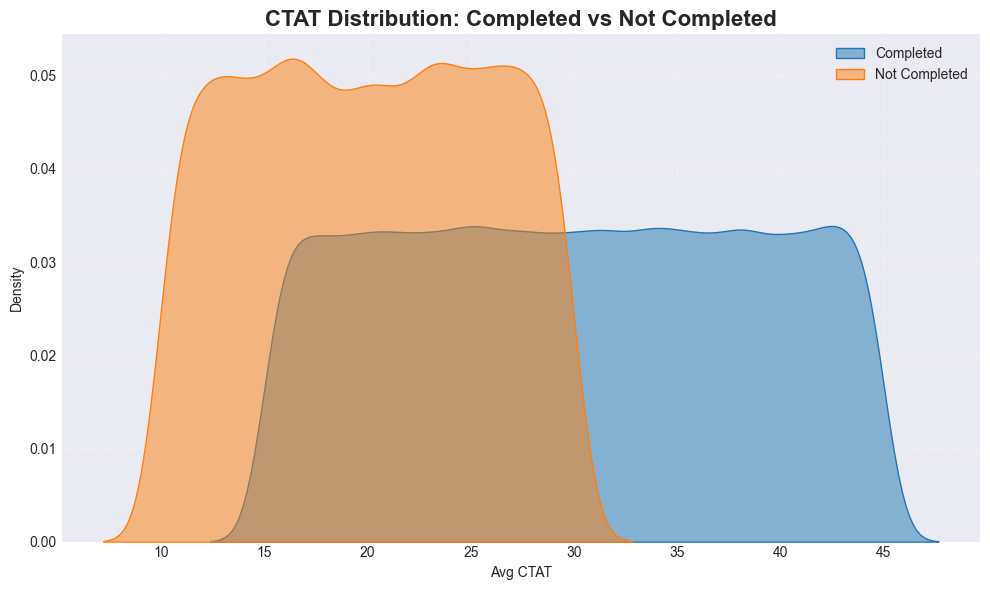

In [70]:
# CTAT distribution by Outcome (Completed vs Not)

# Build Not-Completed flag and filter sensible range
if 'Outcome' not in df.columns:
    def _outcome(row):
        if row.get('Booking Status') == 'Completed':
            return 'Completed'
        if row.get('Booking Status') == 'No Driver Found':
            return 'No Driver Found'
        if row.get('Cancelled Rides by Driver', 0) == 1:
            return 'Cancelled by Driver'
        if row.get('Cancelled Rides by Customer', 0) == 1:
            return 'Cancelled by Customer'
        if row.get('Incomplete Rides', 0) == 1:
            return 'Incomplete'
        return 'Other'
    df['Outcome'] = df.apply(_outcome, axis=1)

plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Outcome']=='Completed'], x='Avg CTAT', fill=True, common_norm=False, alpha=0.5, label='Completed')
sns.kdeplot(data=df[df['Outcome']!='Completed'], x='Avg CTAT', fill=True, common_norm=False, alpha=0.5, label='Not Completed')
plt.title('CTAT Distribution: Completed vs Not Completed', fontsize=16, fontweight='bold')
plt.xlabel('Avg CTAT')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


* Completed rides concentrate at lower CTAT values, while non-completions skew toward longer CTAT.
* Reducing customer wait times (CTAT) should directly improve completion likelihood.

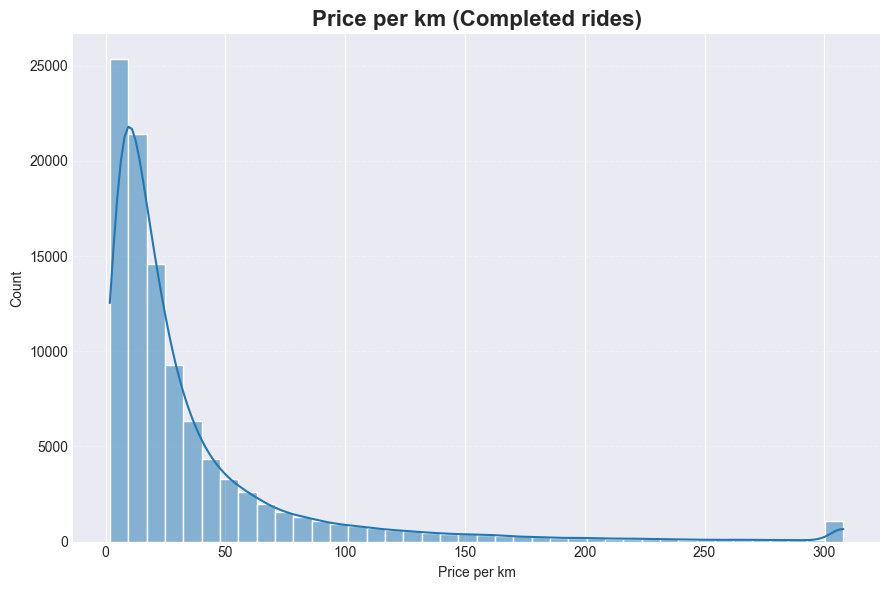

,price_per_km
count,102000.000000
mean,37.876936
std,64.155727
min,1.008065
25%,9.488777
50%,19.011140
75%,39.390427
max,3148.000000


In [71]:
# Price per km distribution (Completed rides)
completed = df[(df.get('Booking Value').notna()) & (df.get('Ride Distance').notna()) & (df.get('Ride Distance')>0)]
completed = completed.copy()
completed['price_per_km'] = completed['Booking Value'] / completed['Ride Distance']
# Winsorize simple: clip to 1st-99th percentiles to reduce long tails
low, high = completed['price_per_km'].quantile([0.01, 0.99])
completed['price_per_km_clipped'] = completed['price_per_km'].clip(lower=low, upper=high)

plt.figure(figsize=(9,6))
sns.histplot(completed['price_per_km_clipped'], bins=40, kde=True, color='#1f77b4')
plt.title('Price per km (Completed rides)', fontsize=16, fontweight='bold')
plt.xlabel('Price per km')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Summary stats
completed['price_per_km'].describe().to_frame('price_per_km')


* Price-per-km clusters around a central band with a long right tail, even after winsorization.
* Investigate tail segments for potential anomalies (very short trips, surge spikes) or pricing optimization.

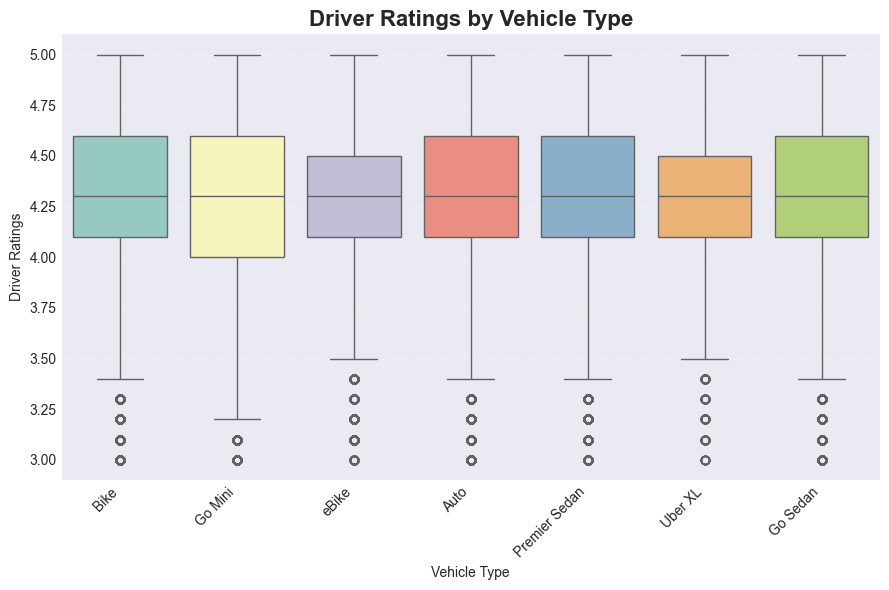

In [72]:
# Driver ratings by Vehicle Type
ratings = df[['Vehicle Type','Driver Ratings']].dropna()
plt.figure(figsize=(9,6))
sns.boxplot(data=ratings, x='Vehicle Type', y='Driver Ratings', palette='Set3')
plt.title('Driver Ratings by Vehicle Type', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('Driver Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

* Median ratings are high overall but differ meaningfully by vehicle type, with varying spread/outliers.
* Address low-rating clusters via targeted driver coaching or vehicle-specific service guidelines.

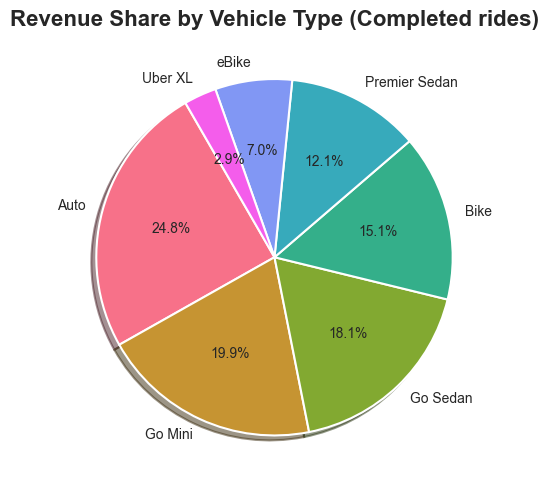

In [79]:
# Revenue share by Vehicle Type (Completed rides)
comp = df.dropna(subset=['Booking Value']).copy()
vehicle_rev = comp.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)
labels = vehicle_rev.index.tolist()
values = vehicle_rev.values

colors = sns.color_palette('husl', len(labels))
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=120,
       colors=colors, shadow=True, wedgeprops={'edgecolor':'white','linewidth':1.5})
ax.set_title('Revenue Share by Vehicle Type (Completed rides)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
